In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import warnings

In [2]:
warnings.simplefilter('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%config InLineBackend.figure_format = 'svg'

In [3]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',index_col = 0, parse_dates=True).dropna()

In [4]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [5]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [6]:
symbol = 'EUR='

In [7]:
data = pd.DataFrame(raw[symbol])

In [8]:
data['returns'] = np.log(data/data.shift(1))

In [9]:
data.dropna(inplace=True)

In [10]:
data['direction'] = np.sign(data['returns']).astype(int)
#tell the positive or nagative of data
#astype change data type to integer

In [11]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


<AxesSubplot: >

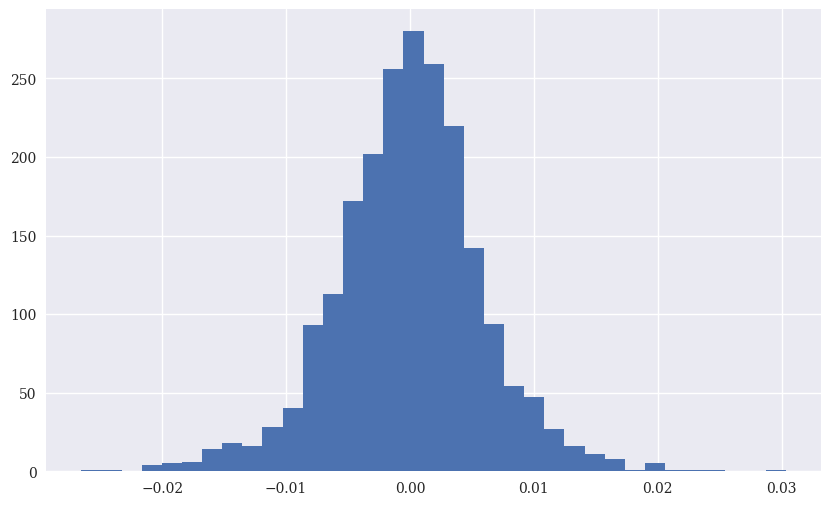

In [12]:
data['returns'].hist(bins=35, figsize=(10,6))

In [13]:
def create_lags(data, lags):
    global cols
    cols=[]
    for lag in range(1, lags+1):
        col='lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [14]:
create_lags(data, 2)
#data = data.drop('lag_0',axis=1)

In [15]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [16]:
data

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544
...,...,...,...,...,...
2018-06-25,1.1702,0.004024,1,0.004644,0.002676
2018-06-26,1.1645,-0.004883,-1,0.004024,0.004644
2018-06-27,1.1552,-0.008018,-1,-0.004883,0.004024


**Regresion**

In [17]:
data.dropna(inplace=True)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])

In [21]:
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])

In [22]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


In [23]:
data[['pos_ols_1', 'pos_ols_2' ]] = np.where(
            data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [24]:
data[['pos_ols_1', 'pos_ols_2' ]]

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-1,-1
2010-01-08,1,1
2010-01-11,-1,-1
2010-01-12,-1,-1
2010-01-13,-1,1
...,...,...
2018-06-25,-1,-1
2018-06-26,-1,-1
2018-06-27,1,1


In [25]:
data['pos_ols_1'].value_counts()

-1    1847
 1     288
Name: pos_ols_1, dtype: int64

In [26]:
data['pos_ols_2'].value_counts()

 1    1377
-1     758
Name: pos_ols_2, dtype: int64

**Vectorized backtesting**

In [27]:
data['start_ols_1'] = data['pos_ols_1'] * data['returns']
data['start_ols_2'] = data['pos_ols_2'] * data['returns']

In [28]:
data[['returns', 'start_ols_1', 'start_ols_2' ]].sum().apply(np.exp)
#calculates e^x for x in data

returns        0.810644
start_ols_1    0.942422
start_ols_2    1.339286
dtype: float64

<AxesSubplot: xlabel='Date'>

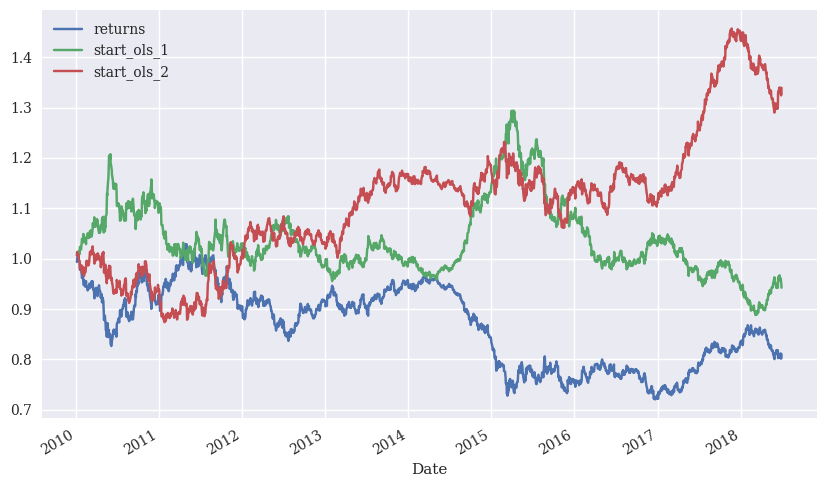

In [29]:
data[['returns', 'start_ols_1', 'start_ols_2' ]].cumsum().apply(np.exp).plot(figsize=(10,6))